# Heart disease classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# We are reading our data
df = pd.read_csv("D:/Soft Computing/archive (18)/heart.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
len(df)

1025

In [5]:
df.shape

(1025, 14)

In [6]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [7]:
# Replace zeroes
zero_not_accepted = ['cp','oldpeak','slope','ca','thal']

In [8]:
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [9]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [10]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,1.234469,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.774549,1.258517,1.484970,2.555110
1,52.408745,0.570342,1.610266,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,1.030038,1.646388,1.159696,2.131179


In [46]:
from sklearn.preprocessing import StandardScaler
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
# split dataset
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X)

      age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1  1.0       125   212    0        1      168      0      1.0   
1      53    1  1.0       140   203    1        0      155      1      3.1   
2      70    1  1.0       145   174    0        1      125      1      2.6   
3      61    1  1.0       148   203    0        1      161      0      1.0   
4      62    0  1.0       138   294    1        1      106      0      1.9   
...   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
1020   59    1  1.0       140   221    0        1      164      1      1.0   
1021   60    1  1.0       125   258    0        0      141      1      2.8   
1022   47    1  1.0       110   275    0        0      118      1      1.0   
1023   50    0  1.0       110   254    0        0      159      0      1.0   
1024   54    1  1.0       120   188    0        1      113      0      1.4   

      slope   ca  thal  
0       2.0  2.0   3.0  
1       1.0  

In [18]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [19]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

820
820
205
205


In [23]:
#transpose matrices
x_train = X_train.T
y_train = y_train.T
x_test = X_test.T
y_test = y_test.T

In [25]:
accuracies = {}

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 84.88%


In [27]:
from sklearn.svm import SVC

In [28]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 73.66%


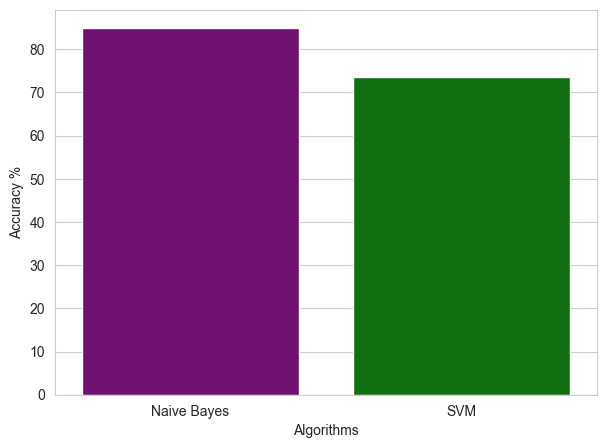

In [31]:
colors = ["purple", "green"]
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [36]:
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)

In [37]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)

<AxesSubplot: title={'center': 'Naive Bayes Confusion Matrix'}>

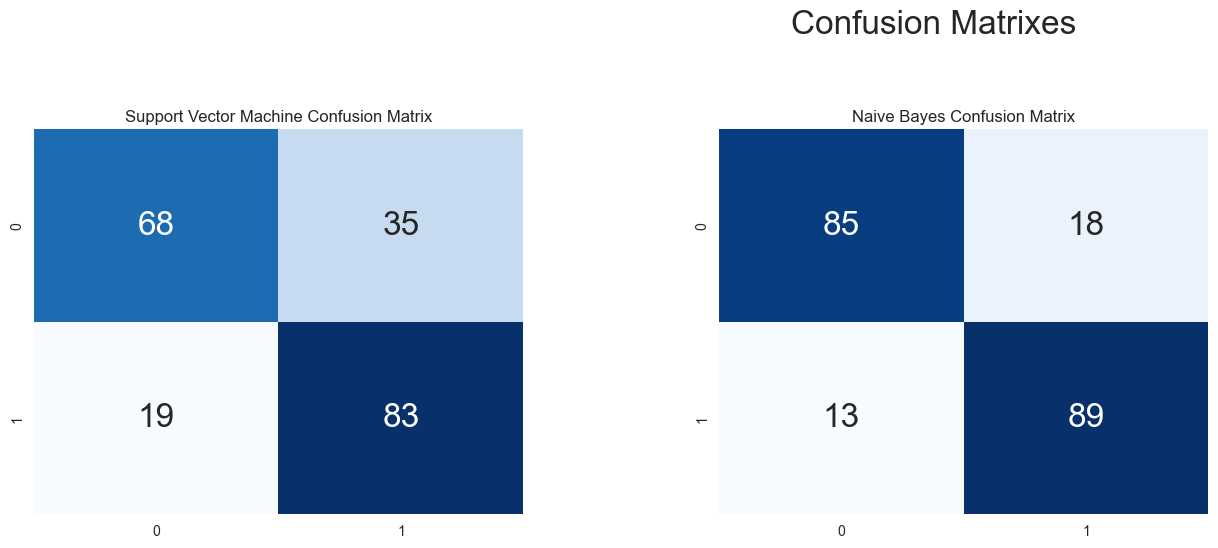

In [41]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


In [43]:
from sklearn.metrics import classification_report
svm_report=print(classification_report(y_test,y_head_svm))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       103
           1       0.70      0.81      0.75       102

    accuracy                           0.74       205
   macro avg       0.74      0.74      0.74       205
weighted avg       0.74      0.74      0.74       205



In [44]:
nb_report=print(classification_report(y_test,y_head_nb))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.83      0.87      0.85       102

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

